<a href="https://colab.research.google.com/github/madonnaojorin/Intro-to-Infectious-Disease-Modeling/blob/main/Compartmental_model_l.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compartmental model 

### Review: what is SIR model?

Let $S$, $I$ and $R$ represent the number of susceptible, infected, and recovered individuals within a population. Susceptibels become infected at a rate $\beta I$ and infectious people recover at a rate $\gamma$. 

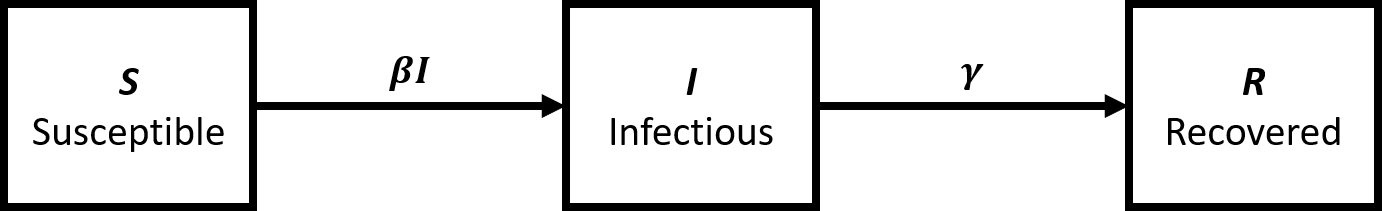

A mathematical description of the above SIR model using differential equations are <br>
\begin{align}
\frac{dS}{dt} &= −\beta SI\\
\frac{dI}{dt} &= \beta SI − \gamma I\\
\frac{dR}{dt} &= \gamma I\\
\end{align}
With the total population $N = S + I + R$.

Notice here we are using mass-action transmission assumption. 

So let's think of COVID-19 epidemic.

We assume the parameter values as follows: 
$R_0 = 2.2$, average pre-infectious period $= 5.2$ days, average duration of infectiousness = $7$ days.


### Solving the system of ODE in R

In [ ]:
install.packages("deSolve")
library(deSolve)

#### (1) Writing the system of differential equations 

In [ ]:
SIR <- function(time, state, parameters) {
  with(as.list(c(state, parameters)), { 
    dS <- -beta * I *S
    dI <-  beta * I * S -gamma * I 
    dR <-  gamma * I
  return(list(c(dS, dI, dR))) })
}

#### (2) Defining parameter values

In [ ]:
# Decide the total population
N = 100000

(parameters_values <- c(
  beta  = 0.3/N,    # infectious contact rate (/person/day)
  gamma = 1/7       # recovery rate (/day)
))

#### (3) Defining initial values 

In [ ]:
(initial_values <- c(
    S = N - 1,  # number of susceptibles at time = 0
    I = 1,      # number of infectious at time = 0
    R = 0       # number of recovered (and immune) at time = 0
))

#### (4) Defining time points

In [ ]:
time_values <- seq(0, 180, by = 0.1) # days

#### (5) Numerically solve the SIR model

Now, we use the ode() function of the deSolve package to numerically solve our model:

In [ ]:
SIR_results <- ode(
  y = initial_values,
  times = time_values,
  func = SIR,
  parms = parameters_values 
)

Let's check the calculated values:

In [ ]:
SIR_results

Let's plot the results!

In [ ]:
plot(SIR_results)

This is the same way we plotted on June 2.

Because we now have 3 equations instead of 1, we get 3 separate graphs.

But what we want is 3 curves on a same plot. 

So we do the following:


In [ ]:
plot(SIR_results[,"time"], SIR_results[,"S"], type="l", col = "red", xlab = "Time (days)", ylab = "Number of people",
ylim=c(0,max(SIR_results[,"S"],SIR_results[,"I"],SIR_results[,"R"])))
lines(SIR_results[,"time"], SIR_results[,"I"], type = "l", col = "blue", lwd = 2)
lines(SIR_results[,"time"], SIR_results[,"R"], type = "l", col = "green", lwd = 2)
legend("right", c("Susceptible", "Infectious", "Recovered"), 
       col = c("red", "blue", "green"), lty = 1, bty = "n")

This gives you what you wanted but you need to write "SIR_results[,]" many times.

Writing a lot (copy and paste) is not great because it's tedious and also cause more error. 

That's why we change SIR_results to a data frame.

In [ ]:
SIR_plot <- data.frame("time" = SIR_results[,"time"], 
                          "S" = SIR_results[,"S"],
                          "I" = SIR_results[,"I"],
                          "R" = SIR_results[,"R"])
                          
with(SIR_plot,
     {plot(time, S, type = "l", col = "red", xlab = "Time (days)", ylab = "Number of people", lwd = 2,
           xlim = c(0,max(time)), ylim = c(0,max(S,I,R)))
      lines(time, I, type = "l", col = "blue", lwd = 2)
      lines(time, R, type = "l", col = "green", lwd = 2)
      legend("right", c("Susceptible", "Infectious", "Recovered"), 
       col = c("red", "blue", "green"), lty = 1, bty = "n")
      })

# This code is the best because you can reuse by modifying a little. 

In [ ]:
# This is equivalent to
plot(SIR_plot$time, SIR_plot$S, type = "l", col = "red", xlab = "Time (days)", ylab = "Number of people", lwd = 2,
           xlim = c(0,max(SIR_plot$time)), ylim = c(0,max(SIR_plot$S,SIR_plot$I,SIR_plot$R)))
lines(SIR_plot$time, SIR_plot$I, type = "l", col = "blue", lwd = 2)
lines(SIR_plot$time, SIR_plot$R, type = "l", col = "green", lwd = 2)
legend("right", c("Susceptible", "Infectious", "Recovered"), 
       col = c("red", "blue", "green"), lty = 1, bty = "n")

#### (6) What can we say looking at this graph?
(a) Looking at the figure do you think $R_0$ is less than 1 or greater than 1? <br>
(b) Calculate $R_0$ to verify your answer. <br>
(c) What is the size of this epidemic? (The number doesn't have to be exact.)  <br>
(d) Approximately what fraction of people got infected throughout the epidemic?

#### Answers 

In [ ]:
# (a)
# Since there is epidemic happening (You see the blue curve), R_0 should be greater than 1.

In [ ]:
# (b)
# Beta/gamma
0.3/(1/7)
parameters_values["beta"]*N/parameters_values["gamma"]

# Please take a look at Prof. Gumel's slides
# beta(N) = beta*N
# beta(N) = beta 

In [ ]:
# (c)
822001
SIR_results[nrow(SIR_results),"R"]

In [ ]:
# (d)
ceiling(SIR_plot[nrow(SIR_plot),"R"]/N*100) # ceiling is to round up.

#### (7) What will happen if we change parameter values?
Remember that $\beta$ is rate at which two specific individuals come into effective contact per unit time, and now we are assuming day as unit time, this means that you have 0.3 contacts with a specific individual per day. $\gamma$ is recovery rate and it is obtained by $\frac{1}{\rm average\ duration\ of\ infectiousness}$.
Now, let's see what would happen if average duration of infectiousness is only 2 days, i.e., change $\gamma = 2$ and run the model again.

In [ ]:
(parameters_values <- c(
  beta  = 0.3/N,    # infectious contact rate (/person/day)
  gamma = 1/2       # recovery rate (/day)
))

SIR_results <- ode(
  y = initial_values,
  times = time_values,
  func = SIR,
  parms = parameters_values 
)

SIR_plot <- data.frame("time" = SIR_results[,"time"], 
                              "S" = SIR_results[,"S"],
                              "I" = SIR_results[,"I"],
                              "R" = SIR_results[,"R"])

with(SIR_plot,
     {plot(time, S, type = "l", col = "red", xlab = "Time (days)", ylab = "Number of people", lwd = 2,
                 xlim = c(0,max(time)), ylim = c(0,max(S,I,R)))
      lines(time, I, type = "l", col = "blue", lwd = 2)
      lines(time, R, type = "l", col = "green", lwd = 2)
      legend("right", c("Susceptible", "Infectious", "Recovered"), 
       col = c("red", "blue", "green"), lty = 1, bty = "n", cex = 1, y.intersp=2)
      })

#### (8) What can we say looking at this graph?
(a) Looking at the figure do you think $R_0$ is less than 1 or greater than 1?<br>
(b) Please calculate $R_0$ to verify your answer. <br>
(c) From this result, if you can produce a medicine that can control the length of infectious period, do you wnat to shorten or prolong?

In [ ]:
# (a)
# Since there is no epidemic, R_0 is less than 1. 

In [ ]:
# (b)
0.6
0.3/(1/2)
(R0 = parameters_values["beta"]/parameters_values["gamma"]*N)

In [ ]:
# (c)
# Shorter infectious period resulted in smaller R_0, 
# so you want to produce a medicine which shorten the infectious period 
# to decreace repoduction number (We want Rc < R_0 otherwise no point to introduce the control measure.)
# Shorter infectious period produces less secondary infections.

Final Size Equation for SIR model

$R(\infty)=1-exp(-R_0 R(\infty))$

$S(\infty)=exp(-\frac{\beta}{\gamma}[1-S(\infty)])$

## SEIR model

Now, let's make it slightly more like COVID-19 epidemic by adding Exposed compartment.

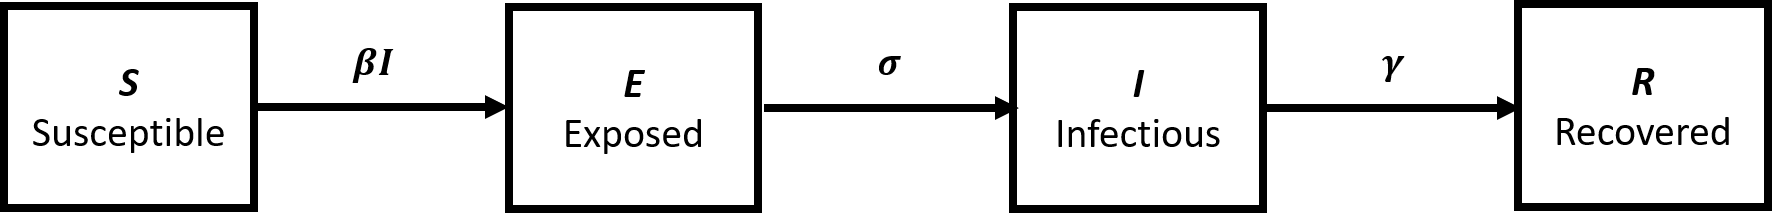

A mathematical description of the above SEIR model using differential equations are <br>
\begin{align}
\frac{dS}{dt} &= −\beta SI\\
\frac{dE}{dt} &= \beta SI − \sigma E\\
\frac{dI}{dt} &= \sigma E − \gamma I\\
\frac{dR}{dt} &= \gamma I\\
\end{align}
With the total population $N = S + E + I + R$.

#### (1) Please modify the code below to implement SEIR model
Remember, average pre-infectiuos period is 5.2 days. <br>
Be careful with name of functions and parameters.

In [ ]:
# Let's first modify the function
SEIR <- function(time, variables, parameters) {
  with(as.list(c(variables, parameters)), {
    dS <- -beta * I * S
    dE <- beta * S * I - sigma * E
    dI <-  sigma * E - gamma * I
    dR <-  gamma * I
    return(list(c(dS, dE, dI, dR)))
  })
}

# Parameters: what else do we need? (Be careful with order.)
(parameters_values2 <- c(
  beta  = 0.3/N,    # infectious contact rate (/person/day)
  sigma = 1/5.2,
  gamma = 1/7       # recovery rate (/day)
))

# Population: let's start with 1 infected person with rest of them susceptible
N = 10000 
(initial_values2 <- c(
    S = N - 1,  # number of susceptibles at time = 0
    E = 0,
    I = 1,      # number of infectious at time = 0
    R = 0       # number of recovered (and immune) at time = 0
))

# Time: Time can be the same as SIR model 
time_values2 <- seq(0, 200, by = 0.1) # days

# ODE function is the same as SIR
SEIR_results <- ode(
  y = initial_values2,
  times = time_values2,
  func = SEIR,
  parms = parameters_values2 
)

# Let's plot!
SEIR_plot <- data.frame("time" = SEIR_results[,"time"], 
                              "S" = SEIR_results[,"S"],
                              "E" = SEIR_results[,"E"],
                              "I" = SEIR_results[,"I"],
                              "R" = SEIR_results[,"R"])

with(SEIR_plot,
     {plot(time, S, type = "l", col = "red", xlab = "Time (days)", ylab = "Number of people", lwd = 2,
                      xlim = c(0,max(time)), ylim = c(0,max(S,E,I,R)))
      lines(time, E, type = "l", col = "pink", lwd = 2)
      lines(time, I, type = "l", col = "blue", lwd = 2)
      lines(time, R, type = "l", col = "green", lwd = 2)
      legend("right",c("Susceptible", "Exposed", "Infectious", "Recovered"), 
       col = c("red","pink", "blue","green"), lty = 1, bty = "n")
      })

#### (2) What can we say looking at the graph?
(a) Looking at the figure do you think $R_0$ is less than 1 or greater than 1? <br>
(b) Do you think $R_0$ would be the same or different from the $R_0$ we obtained from SIR model above? <br>
(c) How about epidemic size? The same or different? (i.e., what happenes to the size of the epidemic as the pre-infectious period is increased/decreased?)<br>
Run the model with different values of pre-infectious period ($\sigma$) and verify your answer.<br>
(d) How does this change affect the curves of the number of susceptible, new infectious individuals, and recovered individuals? 

##########################  SOLUTION ##############################<br>
(a) $R_0$ must be greater than 1 for epidemic to happen. <br>
(b) Because $\sigma$ doesn't affect $R_0$, $R_0$ must be the same as the SIR model.<br>
(c) The duration of the pre-infectious period does not affect the epidemic size;<br>
this is what you would expect since the pre-infectious period has no effect on the infectiousness of each person and therefore, <br>the epidemic would exhaust the same proportion of susceptibles in the population.<br>
(d) A long pre-infectious period results in a longer flatter epidemic, as compared with that resulting from a short pre-infectious period.

In [ ]:
# (a)
parameters_values2["beta"]/parameters_values2["gamma"]*N 

In [ ]:
# (b)
#

In [ ]:
# (c)
SEIR_plot[nrow(SEIR_plot),"R"]
ceiling(SEIR_plot[nrow(SEIR_plot),"R"]/N*100)

In [ ]:
# (d)
#

## Summary for SIR and SEIR model

We have observed that SIR model and SEIR model share the same $R_0$ and hence the same final epidemic size.<br>
In other words, if the pre-infectious period $\sigma$ for SEIR model is 0 then that is indeed SIR model. <br> 
So, pre-infectious period is causing delay.<br>
Let's summarize our results by running the code with several pre-infectious values. 

In [ ]:
#library(deSolve)
# System of ODEs
SIR <- function(time, variables, parameters) {
  with(as.list(c(variables, parameters)), { 
    dS <- -beta * S * I                    
    dI <-  beta * S * I - gamma * I
    dR <-  gamma * I
    return(list(c(dS, dI, dR)))             
  })
}

# Parameters
parameters_values <- c(
  beta  = 0.3/N,    # infectious contact rate (/person/day)
  gamma = 1/7    # recovery rate (/day)
)

# Population
N = 10000 
initial_values <- c(
    S = N - 1,  # number of susceptibles at time = 0
    I = 1,      # number of infectious at time = 0
    R = 0       # number of recovered (and immune) at time = 0
)

# Time
days = 365
time_values <- seq(0, days, by = 0.1) # days

# ODE solver
SIR_results <- ode(
  y = initial_values,
  times = time_values,
  func = SIR,
  parms = parameters_values 
)

# Modify data format
SIR_plot <- data.frame("time" = SIR_results[,"time"], 
                              "S" = SIR_results[,"S"],
                              "I" = SIR_results[,"I"],
                              "R" = SIR_results[,"R"])

# System of ODE functions
SEIR <- function(time, variables, parameters) {
  with(as.list(c(variables, parameters)), {
    dS <- -beta * S * I
    dE <-  beta * S * I - sigma * E
    dI <-  sigma * E - gamma * I
    dR <-  gamma * I
    return(list(c(dS, dE, dI, dR)))
  })
}
# Population
N = 10000 
initial_values <- c(
  S = N - 1,  # number of susceptibles at time = 0
  E = 0,      # number of exposed at time = 0
  I = 1,      # number of infectious at time = 0
  R = 0       # number of recovered (and immune) at time = 0
)

# Time
time_values <- seq(0, days, by = 0.1) # days

# Parameters for SEIR model
pre_infectious_period = c(0.00000001, 1, 5, 7, 14) # days, the first element is approximately 0
parameter <- list()
for (i in 1:5){
  sigma = 1/pre_infectious_period[i]
  (parameter[[i]] <- c(
    beta  = 0.3/N,    # infectious contact rate (/person/day)
    sigma = sigma,    # incubation period
    gamma = 1/7       # recovery rate (/day)
  ))
}

# ODE solver for SEIR model
SEIR_plot <- list()
for (k in 1:5){
  SEIR_results <- ode(
    y = initial_values,
    times = time_values,
    func = SEIR,
    parms = parameter[[k]]
  )
  SEIR_plot[[k]] <- data.frame("time" = SEIR_results[,"time"], 
                               "S" = SEIR_results[,"S"],
                               "E" = SEIR_results[,"E"],
                               "I" = SEIR_results[,"I"],
                               "R" = SEIR_results[,"R"])
}

Ymax = max(SIR_plot$I)+500
# PLot infected curves 
plot(SIR_plot$time, SIR_plot$I, lty = "solid", col=rgb(1, 0, 0, alpha=0.1), xlab = "Time (days)", ylab = "Number of people", lwd = 3,
                      xlim = c(0,days), ylim = c(0,Ymax))
lines(SEIR_plot[[1]]$time, SEIR_plot[[1]]$I, lty = "solid", col = "black", lwd = 3,
                      xlim = c(0,days), ylim = c(0,Ymax))
lines(SEIR_plot[[2]]$time, SEIR_plot[[2]]$I, lty = "solid", col = rainbow(5)[2], lwd = 3,
                      xlim = c(0,days), ylim = c(0,Ymax))
lines(SEIR_plot[[3]]$time, SEIR_plot[[3]]$I, lty = "solid", col = rainbow(5)[3], lwd = 3,
                      xlim = c(0,days), ylim = c(0,Ymax))
lines(SEIR_plot[[4]]$time, SEIR_plot[[4]]$I, lty = "solid", col = rainbow(5)[4], lwd = 3,
                      xlim = c(0,days), ylim = c(0,Ymax))
lines(SEIR_plot[[5]]$time, SEIR_plot[[5]]$I, lty = "solid", col = rainbow(5)[5], lwd = 3,
                      xlim = c(0,days), ylim = c(0,Ymax))
legend("topright",c("SIR model", "SEIR pre infectious period = 0", "SEIR pre infectious period = 1", "SEIR pre infectious period = 5", "SEIR pre infectious period = 7", "SEIR pre infectious period = 14"), 
       col = c("red","black",rainbow(5)[2],rainbow(5)[3],rainbow(5)[4],rainbow(5)[5]), lty = 1, lwd = 5, bty = "n", cex = 1, y.intersp=2)
title("Infected")

## Incorporate vaccination

We have explored a model which can describe a covid-19 epidemic with $\beta = 0.3$, $\sigma = 1/6.4$, $\gamma = 1/7$. <br> 
Having been staying at home all we want is..... vaccine, right? <br>
So, let's incorporate vaccine into our SEIR model.
To avoid confusion, here we use SEIV (V stands for Vaccine; V compartment is for people who are recovered and also vaccinated) model to distinguish from SEIR model which is without vaccine (only recovered).

A mathematical description of the above SEIV model using differential equations are <br>
\begin{align}
\frac{dS}{dt} &= −\beta SI - \nu S\\
\frac{dE}{dt} &= \beta SI − \sigma E\\
\frac{dI}{dt} &= \sigma E − \gamma I\\
\frac{dV}{dt} &= \gamma I + \nu S
\end{align}
With the total population $N = S + E + I + V$.

#### (1) Please modify the code we have seen to incorporate vaccination into SEIR model
Let's assume vaccination rate $\nu = 0.0001$ (0.0001 fraction vaccinated/day).

In [ ]:
# Let's first modify the function
SEIR <- function(time, variables, parameters) {
  with(as.list(c(variables, parameters)), {
    dS <- -beta * I * S
    dE <-  beta * I * S - sigma * E
    dI <-  sigma * E - gamma * I
    dR <-  gamma * I
    return(list(c(dS, dE, dI, dR)))
  })
}

# Population: let's start with 1 infected person with rest of them susceptible
N = 10000 
(initial_values2 <- c(
    S = N - 1,  # number of susceptibles at time = 0
    E = 0,      # number of exposed at time = 0
    I = 1,      # number of infectious at time = 0
    R = 0       # number of recovered (and immune) at time = 0
))

# Parameters: what else do we need? (Be careful with order.)
(parameters_values2 <- c(
  beta  = 0.3/N,      # infectious contact rate (/person/day)
  sigma = 1/6.4,        # the rate at which individuals become infectious (/day)
  gamma = 1/7         # recovery rate (/day)
))

# Time: Time can be the same as SIR model 
time_values2 <- seq(0, 365, by = 0.1) # days

# ODE function is the same as SIR
SEIR_results <- ode(
  y = initial_values2,
  times = time_values2,
  func = SEIR,
  parms = parameters_values2 
)

# Let's plot!
SEIR_plot <- data.frame("time" = SEIR_results[,"time"], 
                              "S" = SEIR_results[,"S"],
                              "E" = SEIR_results[,"E"],
                              "I" = SEIR_results[,"I"],
                              "R" = SEIR_results[,"R"])
with(SEIR_plot,
     {plot(time, S, type = "l", col = "red", xlab = "Time (days)", ylab = "Number of people", lwd = 3,
                      xlim = c(0,max(time)), ylim = c(0,max(S,E,I,R)))
      lines(time, E, type = "l", col = "pink", lwd = 3)
      lines(time, I, type = "l", col = "blue", lwd = 3)
      lines(time, R, type = "l", col = "green", lwd = 3)
      legend("right",c("Susceptible", "Exposed", "Infectious", "Recovered"), 
       col = c("red","pink","blue","green"), lty = 1, bty = "n", cex = 1, y.intersp=2)
      })

#### (2) What can we say looking at the graph?
(a) Do you think $R_c$ (since this is a reproduction number with a control measure, we call it as $R_c$ instead of $R_0$) would be the same or different from the $R_0$ we obtained from SEIR model above? <br>
(b) How about epidemic size? The same or different? (i.e., what happenes to the size of the epidemic as vaccination rate is increased/decreased?)<br>


In [ ]:
# (a)
#  R_c should be less than R_0

In [ ]:
# (b)
# Epidemic size is smaller

I hope now you rediscovered the importance of control measures such as vaccine or NPI. 

**References**<br>
Li Q, Guan X, Wu P, et al. Early transmission dynamics in Wuhan, China, of novel coronavirus-infected pneumonia. N Engl J Med. 2020;382(13):1199–1207.

Wölfel R, Corman VM, Guggemos W, et al. Virological assessment of hospitalized patients with COVID-2019. Nature 581, 465–469 (2020).

